In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
# Importing requests to extract content from a url
import requests   
from bs4 import BeautifulSoup as bs t 
import re 
iphone_reviews=[]

In [2]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object for iterating over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"}) 
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip

In [3]:
# Remove repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# converting reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \xa0read more ',
 'Its an awesome phone',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.',
 'Awesome iphone in this price range.\ni would recommend this phone',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'Excellent product. Can be recommended to my friends and family members.',
 'I got my iPhone 5c white colour in good condition and best rate 

In [6]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \xa0read more ','Its an awesome phone',"""Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.""",'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.','Awesome iphone in this price range.\ni would recommend this phone',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Excellent product. Can be recommended to my friends and family members.','I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also','Good product. Worth buying. Nice phone. Timely delivery by snap deal',...,"""It's good Value for the money paid . The Item was well packed and delivered on time .""","""It's really 100% worth to buy this product. I am fully satisfied with this product.""",'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear','Lacks the feel.','Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!','got delivered on time and satisfactory product as always','A mush have deal','The product quality is good but the only thing is memory capacity is not sufficient for storing the data','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .']


In [8]:
# preprocessing

In [9]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \\xa0read more \'  \'Its an awesome phone\'  "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal\'s service. 100% satisfactory. Genuine product with honest service. So don\'t believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience."  \'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.\'  \'Awesome iphone in this price range.\\ni would recommend this phone\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'Excellent product. Can be recommended to my friends and family members.\'  \'I got my iPhone 5c white colour in good condition and 

In [10]:
# Removing Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Amazing product at this priceAt first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr xa0read more   Its an awesome phone  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  Awesome iphone in this price rangeni would recommend this phone  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Excellent product Can be recommended to my friends and family members  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other site

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# remove https or url within text
import re
no_url_txt=re.sub(r'http\S+', '', no_punc_text)
no_url_txt

'Amazing product at this priceAt first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr xa0read more   Its an awesome phone  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  Awesome iphone in this price rangeni would recommend this phone  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  Excellent product Can be recommended to my friends and family members  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other site

In [16]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_txt)
print(text_tokens)

['Amazing', 'product', 'at', 'this', 'priceAt', 'first', 'I', 'was', 'reluctant', 'to', 'buy', 'an', 'apple', 'product', 'from', 'snapdeal', 'but', 'the', 'deal', 'made', 'me', 'crazy', 'n', 'I', 'ordered', 'with', 'fingers', 'cr', 'xa0read', 'more', 'Its', 'an', 'awesome', 'phone', 'Honestly', 'speaking', 'initially', 'I', 'was', 'hesitated', 'because', 'of', 'previous', 'reviews', 'about', 'snapdeal', 'But', 'those', 'all', 'reviews', 'are', 'fake', 'and', 'just', 'to', 'damage', 'the', 'reputation', 'of', 'snapdeal', 'I', 'am', 'truely', 'satisfied', 'by', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'with', 'honest', 'service', 'So', 'dont', 'believe', 'on', 'rumours', 'I', 'am', 'going', 'with', 'five', 'stars', 'Thanks', 'snapdeal', 'for', 'wonderful', 'shopping', 'experience', 'Good', 'budgeted', 'iphone', 'Should', 'only', 'go', 'for', 'it', 'if', 'want', 'to', 'have', 'an', 'iphone', 'experience', 'but', 'within', 'your', 'budget', 'Awesome', 'iphone', 

In [17]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
len(text_tokens)

1573

In [19]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

stop_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(stop_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Amazing', 'product', 'priceAt', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 'deal', 'made', 'crazy', 'n', 'ordered', 'fingers', 'cr', 'xa0read', 'Its', 'awesome', 'phone', 'Honestly', 'speaking', 'initially', 'hesitated', 'previous', 'reviews', 'snapdeal', 'But', 'reviews', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'honest', 'service', 'So', 'dont', 'believe', 'rumours', 'going', 'five', 'stars', 'Thanks', 'snapdeal', 'wonderful', 'shopping', 'experience', 'Good', 'budgeted', 'iphone', 'Should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'Awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'Excellent', 'product', 'Can', 'recommended', 'friends', 'family', 'members', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', '

In [20]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'good', 'product', 'worth', 'buying', 'nice', 'phone', 'timely', 'delivery', 'snap', 'deal', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'it', 'packed', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'ios', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'everyone', 'go', 'phone', 'budget', '20k', 'worth', 'price', 'excellent', 'features', 'overall', 'performance', 'good', 'awesome', 'mobile', 'working', 'smooth', 'like', 'apple', 'iphone', 'hahahaha', 'cool', 'its', 'cool', 'phone', 'good', 'processing', 'latest', 'ios', 'the']


In [21]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['best', 'rate', 'nsnapdeal', 'rate', 'alway', 'lowest', 'site', 'store', 'also', 'good', 'product', 'worth', 'buy', 'nice', 'phone', 'time', 'deliveri', 'snap', 'deal', 'awsm', 'delivri', 'time', 'product', 'recievd', 'good', 'condit', 'think', 'awsm', 'site', 'shope', 'recent', 'purchas', 'phone', 'bit', 'doubtful', 'purchas', 'must', 'tell', 'best', 'iphon', 'get', 'price', 'it', 'pack', 'beati', 'seller', 'day', 'dispatchnprosn1', 'veri', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'veri', 'smoothn4', 'good', 'build', 'qualitynnconsn1plast', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'bodi', 'look', 'attract', 'premium', 'good', 'plastuc', 'use', 'everyon', 'go', 'phone', 'budget', '20k', 'worth', 'price', 'excel', 'featur', 'overal', 'perform', 'good', 'awesom', 'mobil', 'work', 'smooth', 'like', 'appl', 'iphon', 'hahahaha', 'cool', 'it', 'cool', 'phone', 'good', 'process', 'latest', 'io', 'the']


In [22]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

amazing product priceat first reluctant buy apple product snapdeal deal made crazy n ordered fingers cr xa0read its awesome phone honestly speaking initially hesitated previous reviews snapdeal but reviews fake damage reputation snapdeal truely satisfied snapdeals service 100 satisfactory genuine product honest service so dont believe rumours going five stars thanks snapdeal wonderful shopping experience good budgeted iphone should go want iphone experience within budget awesome iphone price rangeni would recommend phone the os take around 5gb leaving 3 gb files unless youre heavy files user excellent product can recommended friends family members got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also good product worth buying nice phone timely delivery snap deal awsme delivry time product recievd good condition think awsme site shoping recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller

In [23]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['amazing', 'product', 'priceat', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 'deal', 'make', 'crazy', 'n', 'order', 'finger', 'cr', 'xa0read', 'its', 'awesome', 'phone', 'honestly', 'speak', 'initially', 'hesitate', 'previous', 'review', 'snapdeal', 'but', 'review', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeal', 'service', '100', 'satisfactory', 'genuine', 'product', 'honest', 'service', 'so', 'do', 'not', 'believe', 'rumour', 'go', 'five', 'star', 'thank', 'snapdeal', 'wonderful', 'shopping', 'experience', 'good', 'budgeted', 'iphone', 'should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 're', 'heavy', 'file', 'user', 'excellent', 'product', 'can', 'recommend', 'friend', 'family', 'member', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rat

In [24]:
clean_comments=' '.join(lemmas)
clean_comments

'amazing product priceat first reluctant buy apple product snapdeal deal make crazy n order finger cr xa0read its awesome phone honestly speak initially hesitate previous review snapdeal but review fake damage reputation snapdeal truely satisfied snapdeal service 100 satisfactory genuine product honest service so do not believe rumour go five star thank snapdeal wonderful shopping experience good budgeted iphone should go want iphone experience within budget awesome iphone price rangeni would recommend phone the os take around 5 gb leave 3 gb file unless you re heavy file user excellent product can recommend friend family member get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also good product worth buy nice phone timely delivery snap deal awsme delivry time product recievd good condition think awsme site shop recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap

In [25]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_cmntscv=cv.fit_transform(lemmas)

In [26]:
print(cv.vocabulary_)

{'amazing': 23, 'product': 264, 'priceat': 257, 'first': 132, 'reluctant': 293, 'buy': 55, 'apple': 28, 'snapdeal': 335, 'deal': 93, 'make': 196, 'crazy': 84, 'order': 232, 'finger': 131, 'cr': 83, 'xa0read': 410, 'its': 180, 'awesome': 33, 'phone': 245, 'honestly': 162, 'speak': 342, 'initially': 167, 'hesitate': 160, 'previous': 255, 'review': 296, 'but': 54, 'fake': 123, 'damage': 88, 'reputation': 294, 'truely': 381, 'satisfied': 302, 'service': 312, '100': 1, 'satisfactory': 301, 'genuine': 140, 'honest': 161, 'so': 338, 'do': 105, 'not': 223, 'believe': 42, 'rumour': 297, 'go': 143, 'five': 133, 'star': 344, 'thank': 357, 'wonderful': 404, 'shopping': 322, 'experience': 122, 'good': 144, 'budgeted': 51, 'iphone': 173, 'should': 323, 'want': 395, 'within': 403, 'budget': 50, 'price': 256, 'rangeni': 283, 'would': 409, 'recommend': 292, 'the': 360, 'os': 234, 'take': 354, 'around': 29, 'gb': 139, 'leave': 186, 'file': 128, 'unless': 384, 'you': 412, 're': 285, 'heavy': 159, 'user':

In [27]:
print(cv.get_feature_names()[100:200])

['dere', 'dis', 'discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous']


In [28]:
print(clean_cmntscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(clean_cmntscv.toarray().shape)

(1028, 413)


In [30]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'awesome', 'body', 'bt', 'budget', 'but', 'buy', 'camera', 'can', 'cheap', 'condition', 'cool', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'file', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'have', 'interest', 'io', 'iphone', 'issue', 'it', 'its', 'job', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfied', 'seller', 'service', 'shipping', 'shop', 'site', 'smooth', 'snap', 'snapdeal', 'so', 'space', 'star', 'store', 'superb', 'take', 'thank', 'the', 'thing', 'think', 'this', 'though', 'till', 'time', 'use', 'very', 'want', 'well', 'within', 'work', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000r', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'budgeted', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'committed', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere'

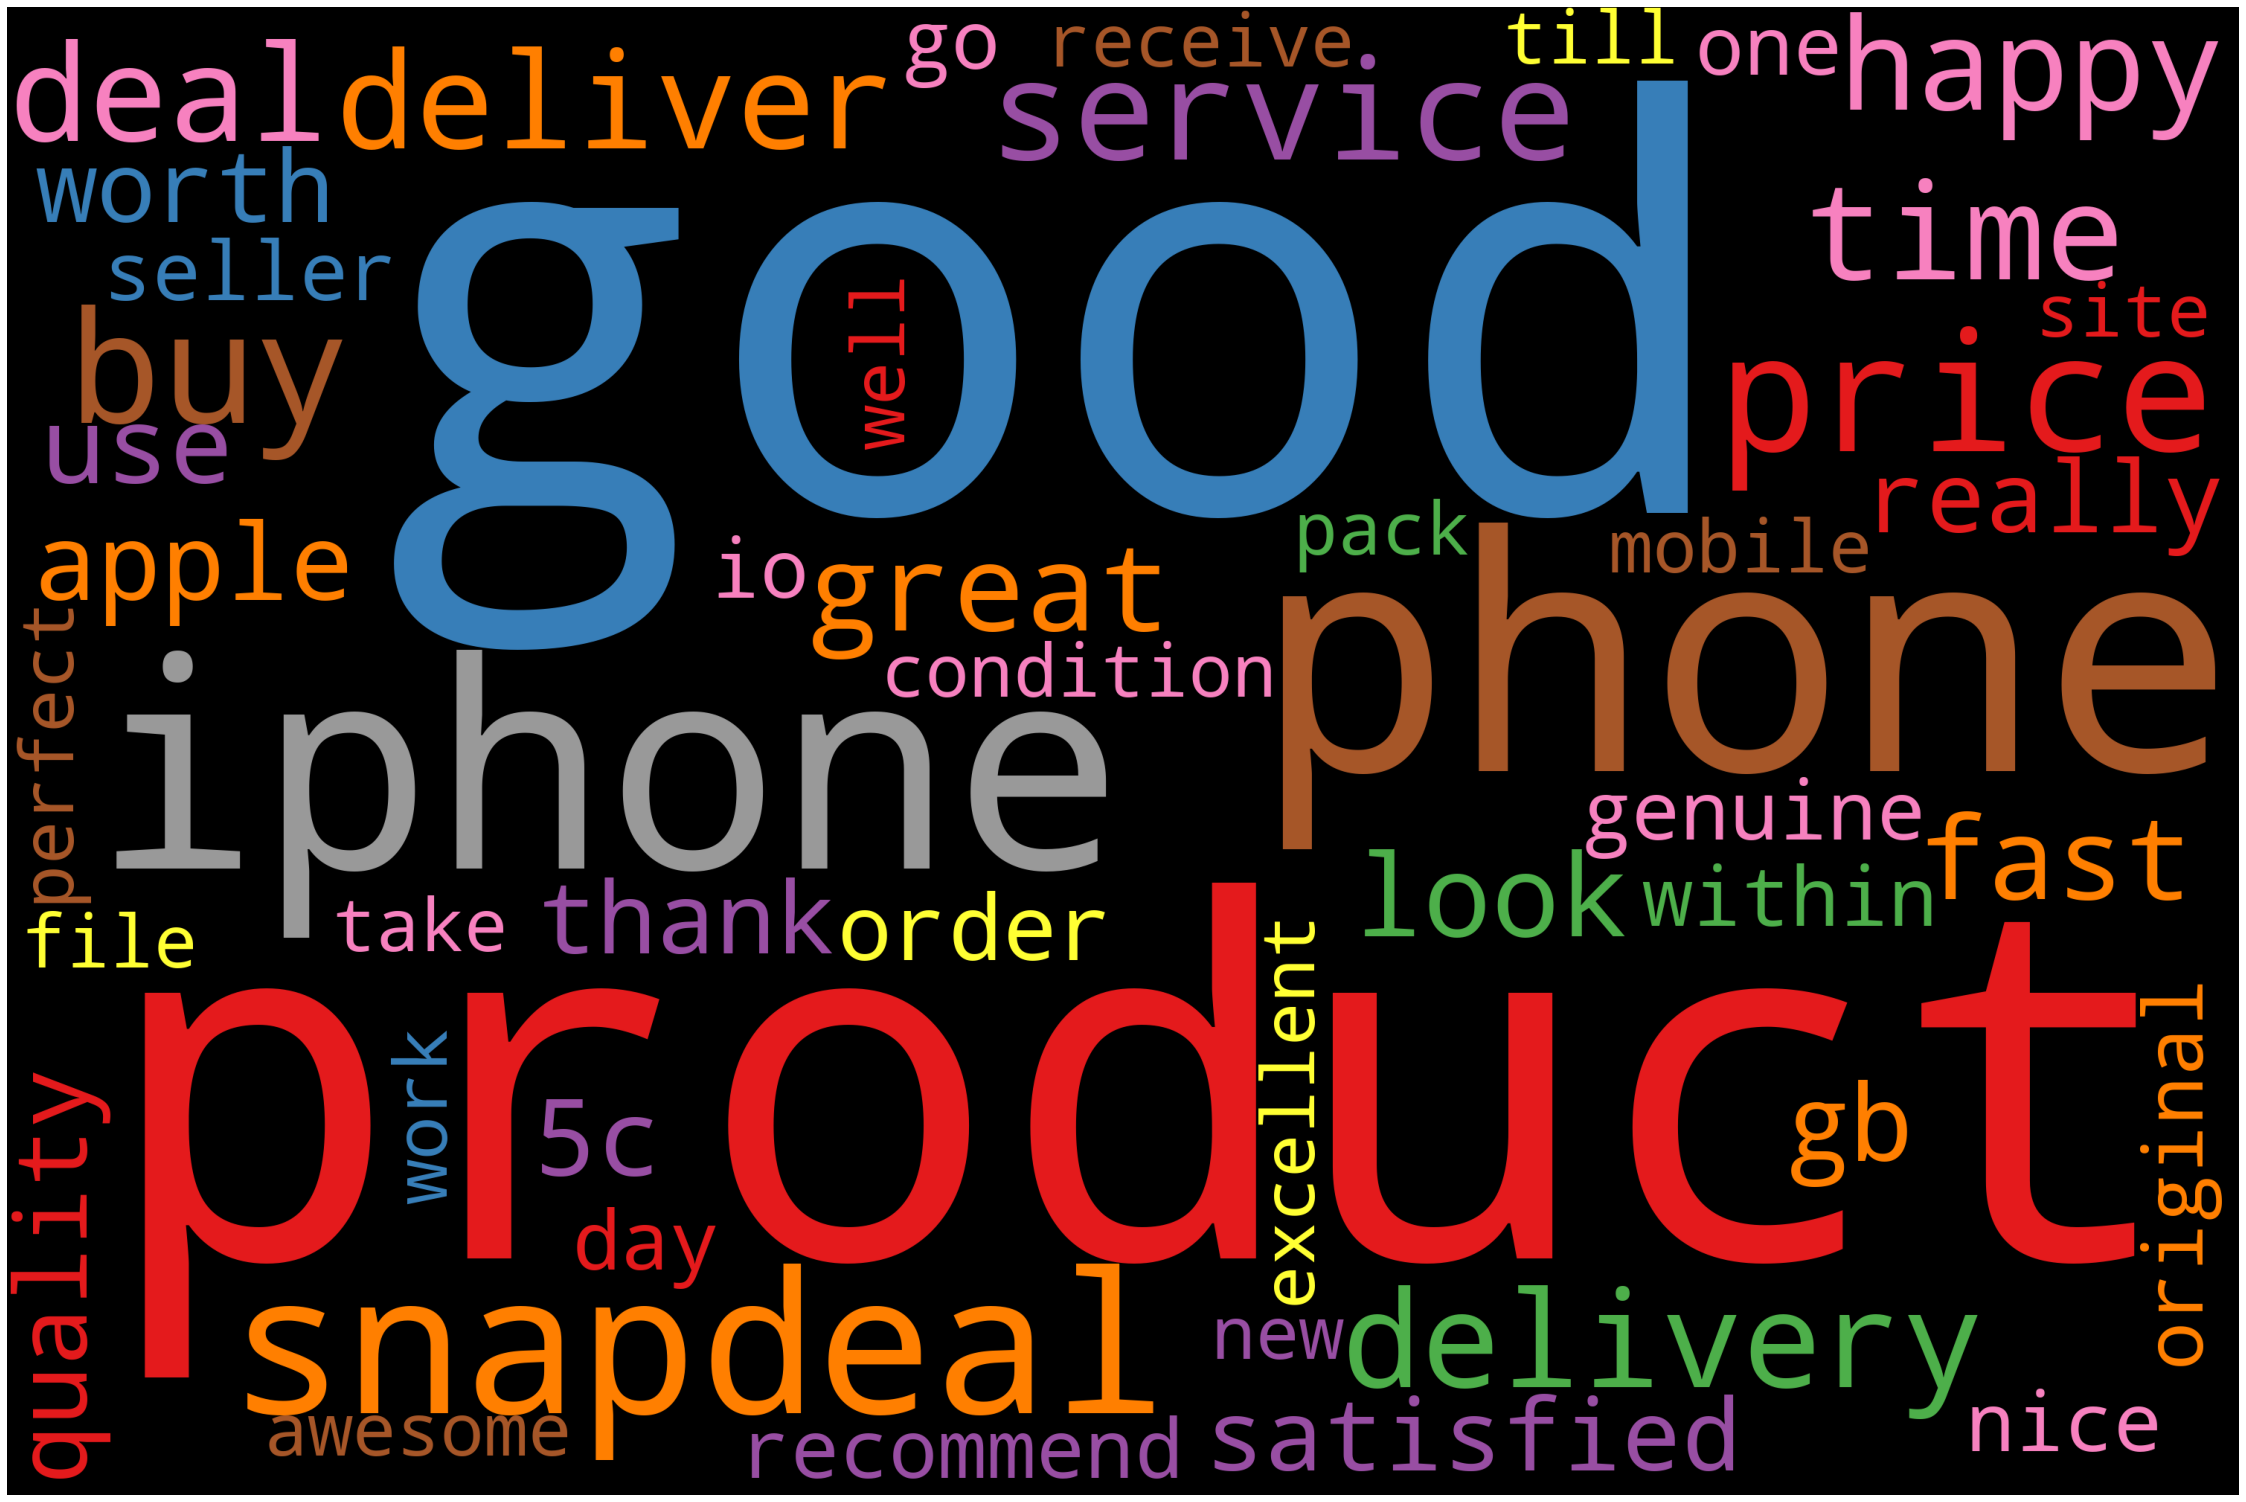

In [34]:
# Word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

In [35]:
# name entity recognition

In [36]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [37]:
for token in doc_block[100:200]:
    print(token,token.pos_)

colour NOUN
good ADJ
condition NOUN
good ADJ
rate NOUN
nsnapdeal NOUN
rate NOUN
always ADV
low ADJ
site NOUN
store NOUN
also ADV
good ADJ
product NOUN
worth ADJ
buy VERB
nice ADJ
phone NOUN
timely ADJ
delivery NOUN
snap NOUN
deal NOUN
awsme NOUN
delivry PROPN
time NOUN
product NOUN
recievd VERB
good ADJ
condition NOUN
think VERB
awsme NOUN
site NOUN
shop NOUN
recently ADV
purchase VERB
phone NOUN
bit NOUN
doubtfull ADJ
purchasing NOUN
must AUX
tell VERB
good ADJ
iphone NOUN
get VERB
price NOUN
it PRON
pack VERB
beatifully ADV
seller NOUN
day NOUN
dispatchnprosn1 NOUN
very ADV
cheap ADJ
prizen2 NOUN
io VERB
9 NUM
upgraden3 NOUN
very ADV
smoothn4 ADJ
good ADJ
build PROPN
qualitynnconsn1plastic PROPN
bodyn2 NOUN
8 NUM
gb PROPN
memorynnbut PROPN
even ADV
plastic ADJ
body NOUN
look VERB
attractive ADJ
premium NOUN
good ADJ
plastuc NOUN
use VERB
everyone PRON
go VERB
phone NOUN
budget NOUN
20k NOUN
worth ADJ
price NOUN
excellent ADJ
feature NOUN
overall ADJ
performance NOUN
good ADJ
awesome 

In [38]:
# Extracting nouns and verbs
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['feature', 'performance', 'work', 'smooth', 'apple', 'iphone', 'hahahaha', 'cool', 'phone', 'processing', 'io', 'con', 'memory', 'space', 'space', 'fill', 'm', 'service', 'goood', 'ship', 'productthank', 'seller', 'deliver', 'phone', 'memory', 'fill', 'limit', 'product', 'servicealway', 'product', 'quality', 'price', 'delivery', 'service', 'good', 'receive', 'order', 'time', 'phone', 'iphone', 'product', 'thank', 'snepdeal', 'buy', 'deal', 'price', 'servicenthank', 'phone', 'price', 'deliver', 'seal', 'box', 'brand', 'deal', 'product', 'hang', 'use', 'qauttro', 'use', 'take', 'contact', 'quality', 'product', 'problem', 'pay', 'buy', 'iphone', 'deal', 'product', 'update', 'deal', 'product', 'service', 'seller', 'delivery', 'packing', 'picture', 'quality', 'sound', 'hear', 'ad', 'look', 'feel', 'n', 'ncon', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', 'use', 'file', 'transfer', 'iphone', 'itnniphone', 'time', 'delivery', 'star', 'price']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,39
1,phone,28
2,iphone,28
3,price,17
4,buy,15
5,service,12
6,deal,11
7,delivery,11
8,time,11
9,deliver,11


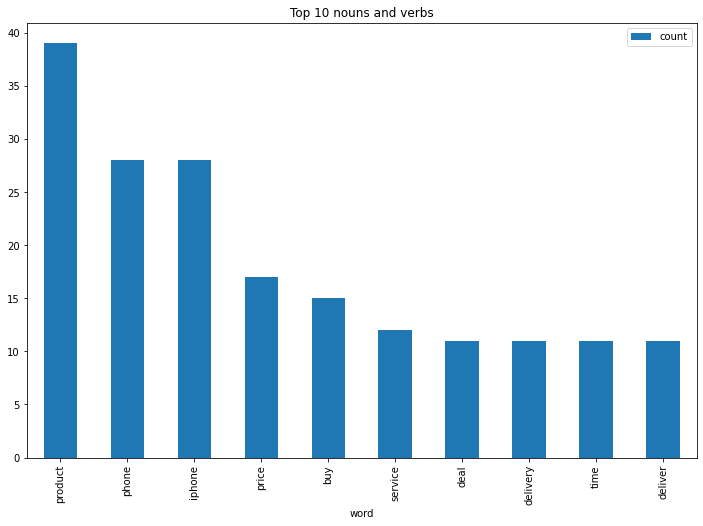

In [40]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [43]:
from nltk import tokenize
sents=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sents

['Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \xa0read more  Its an awesome phone Honestly speaking initially I was hesitated because of previous reviews about snapdeal.',
 'But those all reviews are fake and just to damage the reputation of snapdeal.',
 "I am truely satisfied by snapdeal's service.",
 '100% satisfactory.',
 'Genuine product with honest service.',
 "So don't believe on rumours.",
 'I am going with five stars.',
 'Thanks snapdeal for wonderful shopping experience.',
 'Good budgeted iphone.',
 'Should only go for it if want to have an iphone experience but within your budget.',
 'Awesome iphone in this price range.',
 'i would recommend this phone The OS will take around 5GB, leaving only 3 GB for your files.',
 "Unless you're not a heavy files user.",
 'Excellent product.',
 'Can be recommended to my friends and family members.',
 'I got my iPhone 5c white colour i

In [44]:
sent_df=pd.DataFrame(sents,columns=['sentence'])
sent_df

,sentence
0,Amazing product at this price....At first I wa...
1,But those all reviews are fake and just to dam...
2,I am truely satisfied by snapdeal's service.
3,100% satisfactory.
4,Genuine product with honest service.
...,...
122,Easy and quick returns...
123,Original products...\n\nGood job snapdeal...ke...
124,got delivered on time and satisfactory product...
125,"Excellent camera , crisp display ."


In [45]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [46]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [47]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [48]:
calculate_sentiment(text='great')

3

In [49]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1     -6
2      2
3      0
4      2
      ..
122    1
123    3
124    6
125    3
126    1
Name: sentiment_value, Length: 127, dtype: int64

In [50]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      46
1      14
2       7
3       2
4       5
       ..
122     4
123     7
124    47
125     6
126    12
Name: word_count, Length: 127, dtype: int64

In [51]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1,But those all reviews are fake and just to dam...,-6,14
66,Dont buy on fraudulent schemes.,-4,5
77,Dere is only one problem nd dat is space... Bt...,-4,20
39,Only problem is you need to pay for everything.,-3,9
104,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
105,i bought iphone 5c from snapdeal and the produ...,13,59
32,Overall perfect Price and delivery service are...,14,29
50,It is as shown I have got ths phone in perfect...,15,38
31,"There is total 8 gb space, and almost 6 gb are...",17,64


In [52]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.944882
std        4.308182
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       22.000000
Name: sentiment_value, dtype: float64

In [53]:
# negative sentiment 
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,But those all reviews are fake and just to dam...,-6,14
3,100% satisfactory.,0,2
5,So don't believe on rumours.,0,5
6,I am going with five stars.,0,6
12,Unless you're not a heavy files user.,0,7
19,It was packed beatifully by the seller and sam...,0,11
20,Pros\n1.,0,2
21,Very Cheap prize\n2.,0,4
22,IOS 9 upgrade.,0,3
23,3.,0,1


In [54]:
# positive sentiment 
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Amazing product at this price....At first I wa...,4,46
2,I am truely satisfied by snapdeal's service.,2,7
4,Genuine product with honest service.,2,5
7,Thanks snapdeal for wonderful shopping experie...,6,6
8,Good budgeted iphone.,3,3
...,...,...,...
122,Easy and quick returns...,1,4
123,Original products...\n\nGood job snapdeal...ke...,3,7
124,got delivered on time and satisfactory product...,6,47
125,"Excellent camera , crisp display .",3,6


In [55]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Amazing product at this price....At first I wa...,4,46,0
1,But those all reviews are fake and just to dam...,-6,14,1
2,I am truely satisfied by snapdeal's service.,2,7,2
3,100% satisfactory.,0,2,3
4,Genuine product with honest service.,2,5,4
...,...,...,...,...
122,Easy and quick returns...,1,4,122
123,Original products...\n\nGood job snapdeal...ke...,3,7,123
124,got delivered on time and satisfactory product...,6,47,124
125,"Excellent camera , crisp display .",3,6,125


C:\Users\ROHINI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

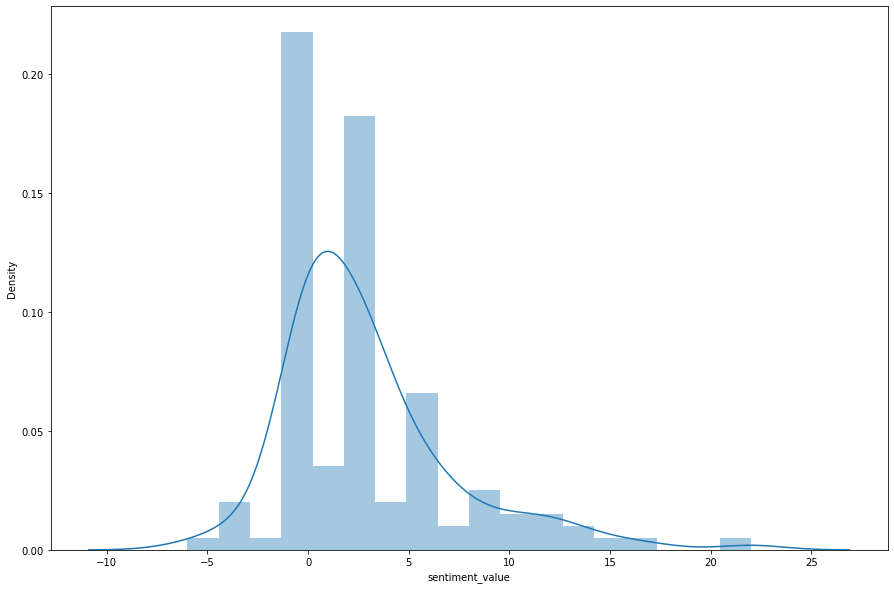

In [56]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

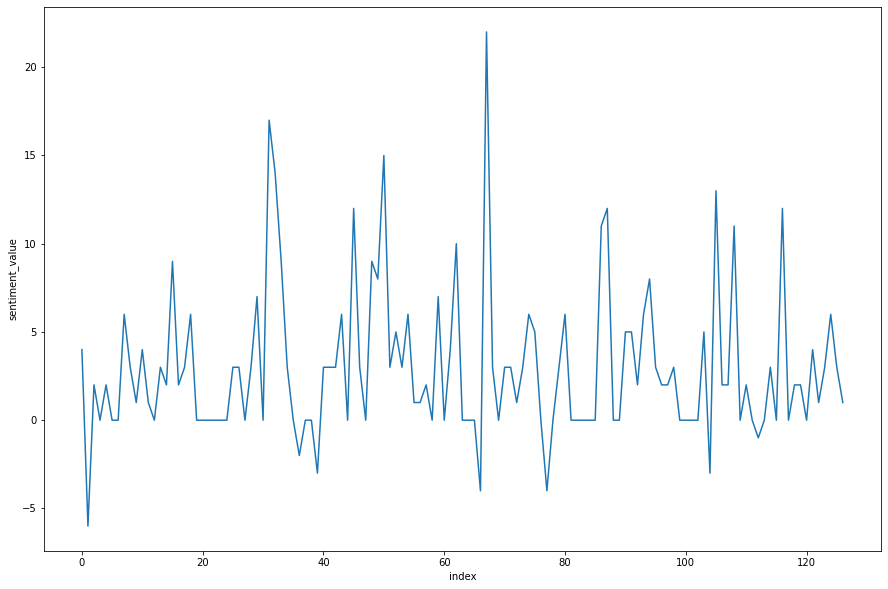

In [57]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

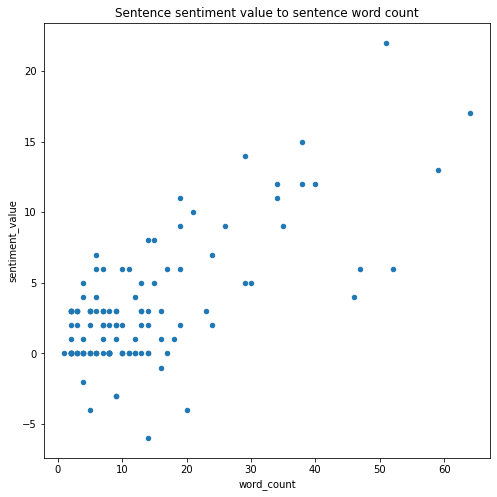

In [58]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')